## Amharic Named Entity Recognition (NER) system

### Performance of model analysis

##### Loading model performance metrics

In [39]:
import os
import sys

sys.path.append(os.path.abspath('../scripts'))
from Plotting import comparing_times

In [11]:
import json 
import pandas as pd
import matplotlib.pyplot as plt


with open('../Model_Performance/Bert-tiny.json', 'r') as json_file:
    Bert_tiny = json.load(json_file)

with open('../Model_Performance/DistilBert.json', 'r') as json_file:
    DistilBert = json.load(json_file)


with open('../Model_Performance/XLM-Roberta.json', 'r') as json_file:
    Xlm_Roberta = json.load(json_file)

In [14]:
bert_performance = pd.DataFrame(Bert_tiny['Epoch_Results'])
DistilBert_performance = pd.DataFrame(DistilBert['Epoch_Results'])
Xlm_Roberta_performance = pd.DataFrame(Xlm_Roberta['Epoch_Results'])

## Performance analysis

#### Performace metics for Bert-tiny-amharic

In [15]:
bert_performance

,epoch,training_loss,validation_loss,precision,recall,f1
0,1,0.1350,0.092690,0.897238,0.902729,0.899975
1,2,0.0925,0.078733,0.924227,0.920889,0.922555
2,3,0.0753,0.072548,0.927990,0.932878,0.930428
3,4,0.0656,0.065159,0.930907,0.938146,0.934513
4,5,0.0600,0.064301,0.929114,0.939601,0.934328


#### Performace metrics for AfroXlmr / Distilbert

In [17]:
DistilBert_performance

,epoch,training_loss,validation_loss,precision,recall,f1
0,1,0.5145,0.459560,0.747649,0.532397,0.621925
1,2,0.4211,0.427247,0.802680,0.576603,0.671113
2,3,0.3876,0.408725,0.816852,0.601211,0.692635


#### Performace metrics for XLM-Roberta

In [18]:
Xlm_Roberta_performance

,epoch,training_loss,validation_loss,precision,recall,f1
0,1,0.1312,0.073673,0.938125,0.946606,0.942346
1,2,0.0591,0.050339,0.954839,0.959942,0.957384
2,3,0.0334,0.042276,0.969026,0.970381,0.969703


**Observation**
- If the selection of model is purely based on the performance without considerting other variables then `XLM-Roberta` outperforms othter models.

## Time analysis

In [25]:
# Training time per minute
Bert_training_time = Bert_tiny['TrainOutput']['metrics']['train_runtime'] / 60
DistilBert_training_time = DistilBert['TrainOutput']['metrics']['train_runtime'] / 60
Xlm_Roberta_training_time = Xlm_Roberta['TrainOutput']['metrics']['train_runtime'] / 60

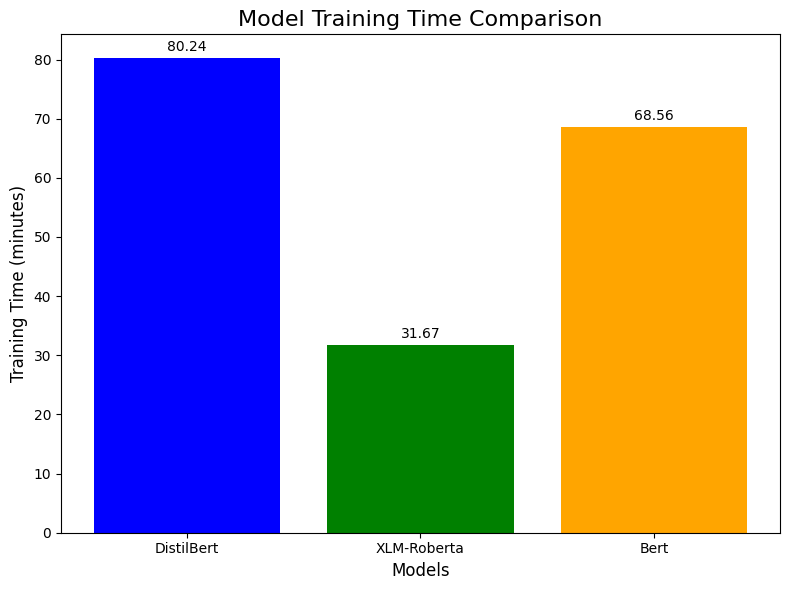

In [40]:
times = [Bert_training_time, DistilBert_training_time, Xlm_Roberta_training_time]
models = ['DistilBert', 'XLM-Roberta','Bert']

comparing_times(models, times)

**Observation**
- From the analysis we can see that `XLM-Roberta` takes less time to train. And the results of XLM-Roberta is fantastic compared to the other modles.
- Overall `XLM-Roberta` is the best-performing model for production based on evaluation metrics.